In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

df = pd.read_csv('train.csv')
print(df)
print(df.describe())

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

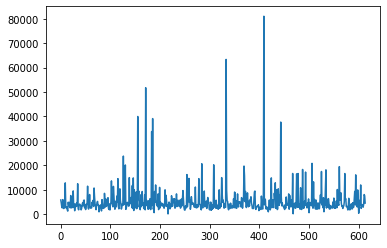

In [2]:
plt.plot(df['ApplicantIncome'])
plt.show()

Y    422
N    192
Name: Loan_Status, dtype: int64

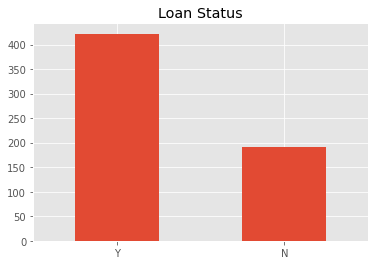

In [3]:
plt.style.use('ggplot')
df['Loan_Status'].value_counts().plot.bar(title='Loan Status', rot=0)
display(df['Loan_Status'].value_counts())


<AxesSubplot:title={'center':'Education Level'}>

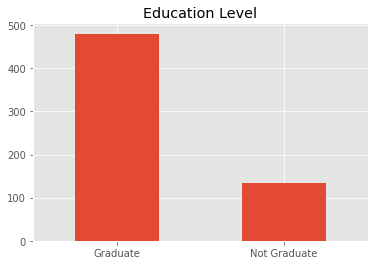

In [4]:
df['Education'].value_counts().plot.bar(title="Education Level", rot=0)

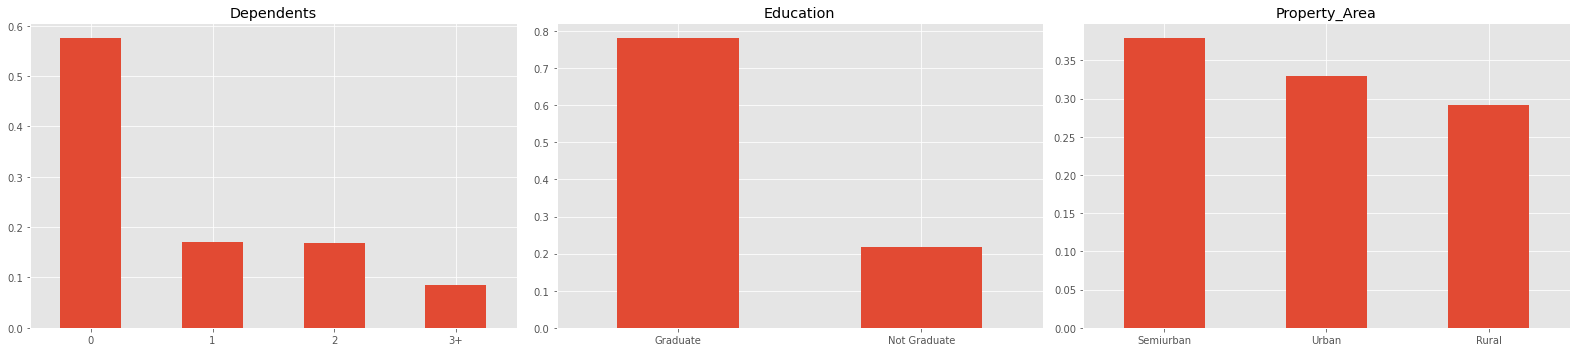

In [5]:
fig2, ax2= plt.subplots(1,3)


df['Dependents'].value_counts(normalize=True).plot(figsize=(22,5),ax=ax2[0],kind='bar',title= 'Dependents',rot=0)
df['Education'].value_counts(normalize=True).plot(ax=ax2[1],kind='bar',title= 'Education',rot=0)
df['Property_Area'].value_counts(normalize=True).plot(ax=ax2[2],kind='bar',title= 'Property_Area',rot=0)

fig2.tight_layout()

In [6]:
df['Dependents'].replace('3+',3,inplace=True)
df['Loan_Status'].replace('N',0, inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

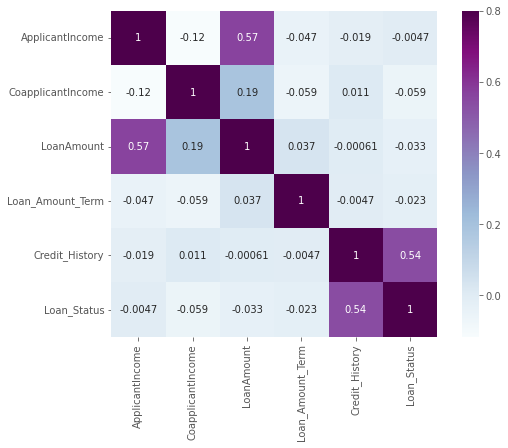

In [7]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [8]:
x = df.drop(['Loan_Status','Loan_ID'],1)
y = df.Loan_Status
x = pd.get_dummies(x)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3)

C:\Users\Manibharathi\AppData\Local\Temp\ipykernel_9292\2754667551.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop(['Loan_Status','Loan_ID'],1)


In [9]:
model = LogisticRegression()
model.fit(train_x, train_y)

pred_cv = model.predict(test_x)
print("Accuray" ,accuracy_score(test_y,pred_cv) * 100)

filename = 'logistic_regression.h5'
joblib.dump(model, filename)

Accuray 79.45945945945945


c:\Users\Manibharathi\Documents\MCA\2_Win_2022\B2_Data_Mining_and_Buisness_Intelligence\project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression.h5']

In [10]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)

pred_cv = model.predict(test_x)
print("Accuray" ,accuracy_score(test_y,pred_cv) * 100)

filename = 'decision_tree.h5'
joblib.dump(model, filename)

Accuray 70.27027027027027


['decision_tree.h5']

In [11]:
model = RandomForestClassifier()
model.fit(train_x, train_y)

pred_cv = model.predict(test_x)
print("Accuray" ,accuracy_score(test_y,pred_cv) * 100)

filename = 'random_forest.h5'
joblib.dump(model, filename)

Accuray 76.21621621621621


['random_forest.h5']